### `Project: Problem Statement - Personal Loan Campaign Modelling`
#### Thera Bank Personal Loan Campaign
#### Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.



### `Objective:`
- The classification goal is to predict the likelihood of a liability customer buying personal loans.
 

### `Learning Outcomes:`
- Exploratory Data Analysis

- Preparing the data to train a model

- Training and making predictions using a classification model

- Model evaluation



### `Domain` 
- Banking

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Context:`

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.




#### Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer(000)
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month(000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any(000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?



### `Steps and tasks:`

1.	Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2.	EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
•	Number of unique in each column?
•	Number of people with zero mortgage?
•	Number of people with zero credit card spending per month?
•	Value counts of all categorical columns.
•	Univariate and Bivariate
•	Get data model ready
3.	Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4.	Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
5.	Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
6.	Give conclusion related to the Business understanding of your model? (5 marks)




**`Please provide you insights wherever necessary.`**

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(style='darkgrid')

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
#Load data
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')


In [3]:
#Print header of the file
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [4]:
print('**************** Dataset Description ******************')
print(bank_df.describe())
print('\n')
print('**************** Dataset Info ******************')
print(bank_df.info())
print('\n')
print('*****************Dataset Shape *****************')
print(bank_df.shape)
print('\n')
print('****************Number of nulls****************')
print(bank_df.isnull().sum())

**************** Dataset Description ******************
            ID      Age  Experience   Income  ZIP Code   Family    CCAvg  \
count 5,000.00 5,000.00    5,000.00 5,000.00  5,000.00 5,000.00 5,000.00   
mean  2,500.50    45.34       20.10    73.77 93,152.50     2.40     1.94   
std   1,443.52    11.46       11.47    46.03  2,121.85     1.15     1.75   
min       1.00    23.00       -3.00     8.00  9,307.00     1.00     0.00   
25%   1,250.75    35.00       10.00    39.00 91,911.00     1.00     0.70   
50%   2,500.50    45.00       20.00    64.00 93,437.00     2.00     1.50   
75%   3,750.25    55.00       30.00    98.00 94,608.00     3.00     2.50   
max   5,000.00    67.00       43.00   224.00 96,651.00     4.00    10.00   

       Education  Mortgage  Personal Loan  Securities Account  CD Account  \
count   5,000.00  5,000.00       5,000.00            5,000.00    5,000.00   
mean        1.88     56.50           0.10                0.10        0.06   
std         0.84    101.71  

### Exploratory Data Analysis

In [6]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [7]:
bank_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
bank_df = bank_df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
bank_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [9]:
len(bank_df[bank_df['Mortgage']==0])


3462

- `Number of people with zero mortgage `

In [10]:
len(bank_df[bank_df['CreditCard']==0])

3530

- `Number of people with zero credit card spending per month `

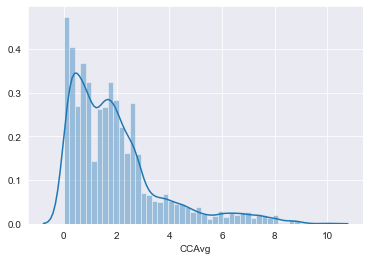

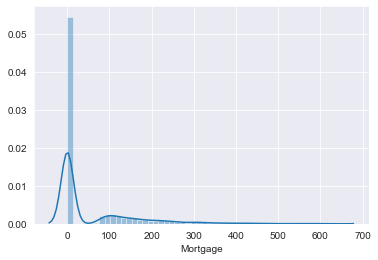

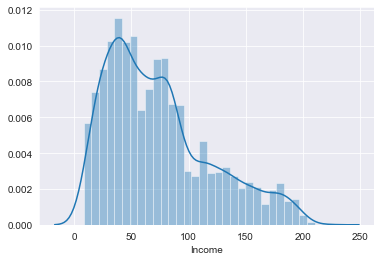

In [11]:
# sns.distplot(bank_df['Income'],color='g', kde=True)
# plt.show()
# or bank_df.hist(figsize=(15,20))

for i in ['CCAvg','Mortgage','Income']:
    sns.distplot(bank_df[i])
    plt.show()

In [12]:
bank_df['Mortgage'].value_counts(normalize=True)

0     0.69
98    0.00
103   0.00
119   0.00
83    0.00
      ... 
541   0.00
509   0.00
505   0.00
485   0.00
577   0.00
Name: Mortgage, Length: 347, dtype: float64

- `Mortgage is highley skewed so we can drop this column `

In [13]:
bank_df.drop(['Mortgage'], axis=1, inplace=True)

In [14]:
# z=list([i for i in bank_df.columns if i not in ['Income','CCAvg','ZIP Code']])
# for column in z:
#     print("\n" + column)
#     print(bank_df[column].value_counts())

In [15]:
# Convert columns which is supposed to be a categorical variable 
to_convert=['CreditCard','Online','CD Account','Securities Account','Personal Loan','Education','Family'] 
bank_df[to_convert] = bank_df[to_convert].astype('category')
bank_df.dtypes

Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [16]:
for i in list(bank_df.columns[bank_df.dtypes=='category']):   # checking value counts of all object type columns
    print(bank_df[i].value_counts(normalize=True))
    print()

1   0.29
2   0.26
4   0.24
3   0.20
Name: Family, dtype: float64

1   0.42
3   0.30
2   0.28
Name: Education, dtype: float64

0   0.90
1   0.10
Name: Personal Loan, dtype: float64

0   0.90
1   0.10
Name: Securities Account, dtype: float64

0   0.94
1   0.06
Name: CD Account, dtype: float64

1   0.60
0   0.40
Name: Online, dtype: float64

0   0.71
1   0.29
Name: CreditCard, dtype: float64




`Personal Loan (value of Y) ratio of zero to one is very imbalance `


### Bivariate Analysis

In [17]:
# check for target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
bank_df.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,CCAvg
Personal Loan,,,,,
0,45.37,20.13,66.24,"93,152.43",1.73
1,45.07,19.84,144.75,"93,153.20",3.91


In [18]:
bank_df.groupby(["Personal Loan"]).median()

,Age,Experience,Income,ZIP Code,CCAvg
Personal Loan,,,,,
0,45.00,20.00,59.00,"93,437.00",1.40
1,45.00,20.00,142.50,"93,407.00",3.80


**Insights:**
- `No major difference in case of Age and Experience and ZIP Code values w.r.t. target variable`

- `Income is higher for people who take loan`

In [19]:
pd.crosstab(bank_df['Family'],bank_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
Family,,
1,0.30,0.22
2,0.26,0.22
3,0.19,0.28
4,0.24,0.28


In [20]:
pd.crosstab(bank_df['Education'],bank_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
Education,,
1,0.44,0.19
2,0.27,0.38
3,0.29,0.43


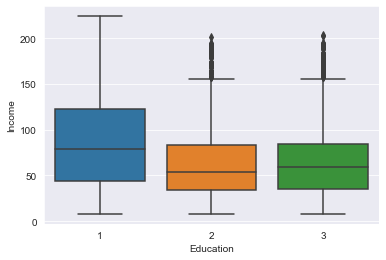

In [21]:
sns.boxplot(x = "Education", y = "Income", data=bank_df)
#  Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

In [22]:
pd.crosstab(bank_df['Online'],bank_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
Online,,
0,0.40,0.39
1,0.60,0.61


In [23]:
pd.crosstab(bank_df['CreditCard'],bank_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
CreditCard,,
0,0.71,0.70
1,0.29,0.30


In [24]:
pd.crosstab(bank_df['CD Account'],bank_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
CD Account,,
0,0.96,0.71
1,0.04,0.29


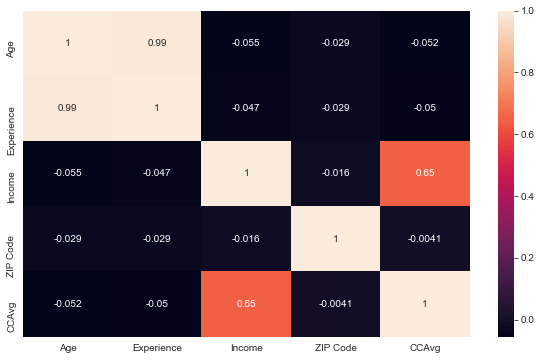

In [44]:
plt.figure(figsize = (10,6))
corr = bank_df.corr()
sns.heatmap(corr, annot = True)

`'Experience' and 'Age' have strong correlation with each other by 0.99 and 'Incom' with 'CCAvg' by 0.65 `

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021702721FD0>,
      dtype=object)

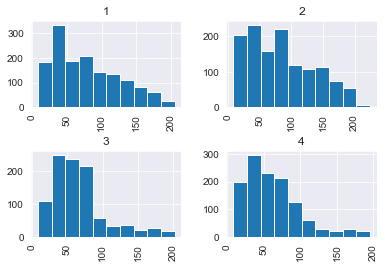

In [26]:
bank_df.hist(by='Family',column = 'Income')

### Data Prepration

In [27]:
X = bank_df.drop('Personal Loan', axis=1)
y = bank_df[['Personal Loan']].astype('category')

print(X.head())
print(y.head())

   Age  Experience  Income  ZIP Code Family  CCAvg Education  \
0   25           1      49     91107      4   1.60         1   
1   45          19      34     90089      3   1.50         1   
2   39          15      11     94720      1   1.00         1   
3   35           9     100     94112      1   2.70         2   
4   35           8      45     91330      4   1.00         2   

  Securities Account CD Account Online CreditCard  
0                  1          0      0          0  
1                  1          0      0          0  
2                  0          0      0          0  
3                  0          0      0          0  
4                  0          0      0          1  
  Personal Loan
0             0
1             0
2             0
3             0
4             0


In [28]:
print(X.shape)
print(y.shape)

(5000, 11)
(5000, 1)


In [29]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)
# X = pd.get_dummies(X, columns=['Family', 'Education'])
X.head()

,Age,Experience,Income,ZIP Code,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,91107,1.60,0,0,1,0,0,1,0,0,0
1,45,19,34,90089,1.50,0,1,0,0,0,1,0,0,0
2,39,15,11,94720,1.00,0,0,0,0,0,0,0,0,0
3,35,9,100,94112,2.70,0,0,0,1,0,0,0,0,0
4,35,8,45,91330,1.00,0,0,1,1,0,0,0,0,1


### Split the data into training and test set in the ratio of 70:30 respectively 

In [31]:
# X = X.values
# y = y.values

In [32]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
y_test

,Personal Loan
1501,0
2586,1
2653,0
1055,0
705,0
...,...
3563,1
1538,0
1837,0
2380,0


### Choose Model, Train and Evaluate

In [34]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
lr = LogisticRegression(random_state=7)
lr.fit(X_train,y_train)

C:\Users\layas\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=7)

In [35]:
y_predicted =  lr.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [36]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predicted
z.head()

,Age,Experience,Income,ZIP Code,CCAvg,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Loan Status,Predicted Loan Status
1501,30,4,35,92130,0.30,1,0,0,1,0,1,0,0,1,0,0
2586,47,23,149,92675,6.10,0,0,1,0,0,0,0,0,1,1,0
2653,30,5,121,94555,3.10,1,0,0,0,0,0,0,1,0,0,0
1055,31,6,62,95630,1.00,0,0,0,0,0,1,0,1,0,0,0
705,62,36,30,94720,0.70,0,1,0,1,0,0,0,1,0,0,0


In [42]:
# z2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
# z2

### Build a confusion matrix

In [45]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9102857142857143

Testing accuracy 0.9006666666666666

Confusion Matrix


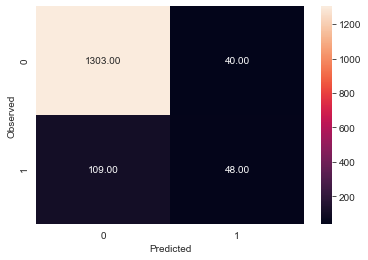

None

Recall: 0.3057324840764331

Precision: 0.5454545454545454

F1 Score: 0.39183673469387753

Roc Auc Score: 0.6379742092757444


In [46]:
print("Trainig accuracy",lr.score(X_train,y_train))  
print()
print("Testing accuracy",lr.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predicted))
print()
print("Recall:",recall_score(y_test,y_predicted))
print()
print("Precision:",precision_score(y_test,y_predicted))
print()
print("F1 Score:",f1_score(y_test,y_predicted))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predicted))

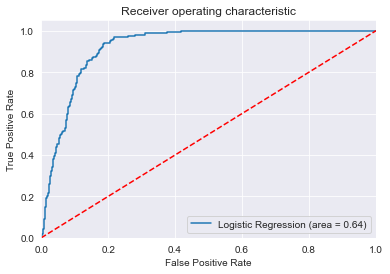

In [40]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [41]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(lr.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
2,Income,0.04
0,Age,0.00
1,Experience,0.00
3,ZIP Code,0.00
4,CCAvg,0.00
5,Family_2,0.00
6,Family_3,0.00
7,Family_4,0.00
8,Education_2,0.00
9,Education_3,0.00


## <a id = "link8"></a>Business Insights 

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted the customers that accept personal loan campaign and customers eligibile for loan

*False Positive (observed=0,predicted=1):*

Predicted that personal loan will be granted and the customer was not eligibile for loan

*True Negative (observed=0,predicted=0):*

Predicted that personal loan will not be granted and the customer was not eligibile for loan

*False Negative (observed=1,predicted=0):*

Predicted that personal loan will not be granted and the customer was eligibile for loan

##### `Important Features`

"Income"

seems only Income was the features which most influence the model's output. Based on the coefficients value of 0.04.


##### `Important Metric`

Here the bank wants converting its liability customers to personal loan customers i.e. **less number of False Positive**, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not eligible for the loan. Hence **Precision is the important metric**.

In case of False negative bank will lose few customers but that okay because the bank would want to retain money more than customers who are not eligible for loan.

